In [1]:
import torch
from cifar10 import cifar10
from matplotlib import pyplot as plt
from torchvision.transforms.functional import pil_to_tensor
import random
dataset = cifar10("train")
# mean_img = torch.zeros((3,32,32))
# for item in dataset:
#     img = item["img"]

#     # plt.imshow(img)
#     # plt.show()
#     img = pil_to_tensor(img)
#     mean_img += img
#     # print(img.size())
#     break


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7699728..1.7390381].


tensor([0.4914, 0.4822, 0.4465])
tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.0641, -0.2192, -0.7038,  ...,  0.4787,  0.0000,  0.0000],
         [-0.0059,  0.1491, -0.0835,  ..., -0.1223,  0.0000,  0.0000],
         [-0.5487, -0.5487, -0.3549,  ..., -0.1223,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [-0.0580, -0.2154, -0.6874,  ...,  0.5320,  0.0000,  0.0000],
         [ 0.0403,  0.1976, -0.0777,  ..., -0.0974,  0.0000,  0.0000],
         [-0.4710, -0.4710, -0.3530,  ..., -0.0777,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0

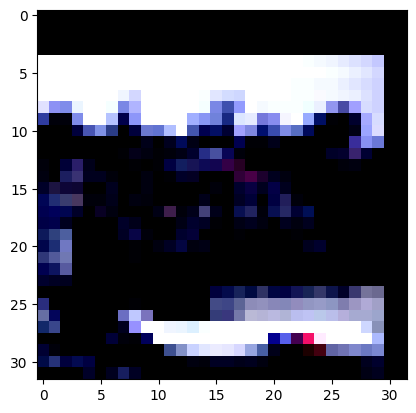

In [2]:
rand_idx = random.sample(range(len(dataset)),k=16)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))

for i , idx in enumerate(rand_idx):

  img , label = dataset[idx]

  #the image tensor's range is not between 0 and 1,so we have to temporarily scale the tensor values into range 0 and 1 to prevent error.
  img = (img - img.min()) / (img.max() - img.min())

  img_class = class_names[label]

  plt.subplot(4,4,i+1)
  plt.imshow(img.permute(1,2,0))
  plt.title(f"Class : {img_class}",fontsize=10)
  plt.axis(False)


In [1]:
from torch.utils.data import random_split
from cifar10 import cifar10
from resnet_config import ResNetConfig, ResNetTrainConfig
all_train_data = cifar10("train")
train_size = int(0.9*len(all_train_data))
val_size = len(all_train_data) - train_size
test_set = cifar10("test")
train_set, val_set = random_split(all_train_data,[train_size,val_size])
train_config = ResNetTrainConfig()
model_config = ResNetConfig()


In [2]:
from train import Trainer
trainer = Trainer(train_set, val_set, test_set,train_config, model_config)
trainer.train()

Resuming training from out/resnet/resnet_ckpt_cifar.pt


/home/varun/projects/experiments-with-gpt2/vision_models/train.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.ckpt = torch.load(ckpt_path, map_location=self.train

No of parameters in the model: 272464


  0%|          | 0/42000 [00:00<?, ?it/s]/home/varun/projects/experiments-with-gpt2/vision_models/train.py:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss += self.criterion(train_logits,torch.tensor(train_batch["label"]).to(self.train_config.device))
/home/varun/projects/experiments-with-gpt2/vision_models/train.py:148: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch["label"]).to(self.train_config.device)
  0%|          | 1/42000 [00:12<151:07:51, 12.95s/it]

Step:86000
Train Loss:0.31341317296028137
Validation Loss:0.30075037479400635
Test Error:0.14030003547668457


  5%|▍         | 1998/42000 [01:42<29:45, 22.41it/s] 

Step:88000
Train Loss:0.2926238477230072
Validation Loss:0.30841484665870667
Test Error:0.1323000192642212


  5%|▍         | 2001/42000 [01:56<15:01:56,  1.35s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 10%|▉         | 3999/42000 [03:37<28:46, 22.01it/s]   

Step:90000
Train Loss:0.3191036581993103
Validation Loss:0.31924325227737427
Test Error:0.13260000944137573


 10%|▉         | 4001/42000 [03:39<15:46:33,  1.49s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 14%|█▍        | 5999/42000 [05:20<26:52, 22.33it/s]   

Step:92000
Train Loss:0.3317740261554718
Validation Loss:0.3643094301223755
Test Error:0.1381000280380249


 14%|█▍        | 6001/42000 [05:21<14:54:59,  1.49s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 19%|█▉        | 7999/42000 [06:51<25:58, 21.82it/s]   

Step:94000
Train Loss:0.3082822263240814
Validation Loss:0.38767507672309875
Test Error:0.14090001583099365


 19%|█▉        | 8002/42000 [07:05<12:52:54,  1.36s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 24%|██▍       | 10000/42000 [08:34<24:15, 21.99it/s]  

Step:96000
Train Loss:0.3151918053627014
Validation Loss:0.3523828089237213
Test Error:0.13210004568099976


 24%|██▍       | 10001/42000 [08:48<14:58:59,  1.69s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 29%|██▊       | 11999/42000 [10:30<22:31, 22.20it/s]   

Step:98000
Train Loss:0.31736063957214355
Validation Loss:0.387339323759079
Test Error:0.14110004901885986


 29%|██▊       | 12001/42000 [10:31<12:28:40,  1.50s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 33%|███▎      | 13999/42000 [12:00<20:47, 22.45it/s]   

Step:100000
Train Loss:0.3604574501514435
Validation Loss:0.424084335565567
Test Error:0.14840000867843628


 33%|███▎      | 14002/42000 [12:13<10:27:30,  1.34s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 38%|███▊      | 16000/42000 [13:43<19:27, 22.26it/s]   

Step:102000
Train Loss:0.3361474871635437
Validation Loss:0.3772505223751068
Test Error:0.1420000195503235


 38%|███▊      | 16003/42000 [13:56<9:41:45,  1.34s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 43%|████▎     | 17998/42000 [15:37<17:48, 22.46it/s]  

Step:104000
Train Loss:0.28682345151901245
Validation Loss:0.35478153824806213
Test Error:0.12639999389648438


 43%|████▎     | 18001/42000 [15:38<8:57:06,  1.34s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 48%|████▊     | 19999/42000 [17:20<16:23, 22.37it/s]  

Step:106000
Train Loss:0.27693769335746765
Validation Loss:0.3707357943058014
Test Error:0.13090002536773682


 48%|████▊     | 20001/42000 [17:21<9:05:53,  1.49s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 52%|█████▏    | 21999/42000 [18:52<15:06, 22.06it/s]  

Step:108000
Train Loss:0.30927860736846924
Validation Loss:0.35372957587242126
Test Error:0.13700002431869507


 52%|█████▏    | 22002/42000 [19:05<7:30:15,  1.35s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 57%|█████▋    | 24000/42000 [20:47<13:19, 22.52it/s]  

Step:110000
Train Loss:0.2713042199611664
Validation Loss:0.34289753437042236
Test Error:0.12220001220703125


 57%|█████▋    | 24001/42000 [20:48<8:18:47,  1.66s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 62%|██████▏   | 25999/42000 [22:30<11:51, 22.50it/s]  

Step:112000
Train Loss:0.3468833565711975
Validation Loss:0.4306904971599579
Test Error:0.14329999685287476


 62%|██████▏   | 26001/42000 [22:31<6:38:23,  1.49s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 67%|██████▋   | 27999/42000 [24:00<10:49, 21.56it/s]  

Step:114000
Train Loss:0.34838271141052246
Validation Loss:0.39993754029273987
Test Error:0.14219999313354492


 67%|██████▋   | 28002/42000 [24:14<5:14:33,  1.35s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 71%|███████▏  | 30000/42000 [25:43<09:00, 22.22it/s]  

Step:116000
Train Loss:0.265550822019577
Validation Loss:0.35589101910591125
Test Error:0.12639999389648438


 71%|███████▏  | 30003/42000 [25:57<4:29:36,  1.35s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 76%|███████▌  | 31998/42000 [27:37<07:41, 21.69it/s]  

Step:118000
Train Loss:0.34313708543777466
Validation Loss:0.4439244270324707
Test Error:0.15540003776550293


 76%|███████▌  | 32001/42000 [27:40<3:45:14,  1.35s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 81%|████████  | 33999/42000 [29:10<06:03, 22.02it/s]  

Step:120000
Train Loss:0.3338101804256439
Validation Loss:0.3894059956073761
Test Error:0.14079999923706055


 81%|████████  | 34002/42000 [29:23<3:00:18,  1.35s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 86%|████████▌ | 36000/42000 [30:53<04:32, 22.01it/s]  

Step:122000
Train Loss:0.2929958403110504
Validation Loss:0.37388598918914795
Test Error:0.13530004024505615


 86%|████████▌ | 36003/42000 [31:07<2:15:04,  1.35s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 90%|█████████ | 37998/42000 [32:47<02:59, 22.33it/s]  

Step:124000
Train Loss:0.26342615485191345
Validation Loss:0.3551349937915802
Test Error:0.12130004167556763


 90%|█████████ | 38001/42000 [32:49<1:29:13,  1.34s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


 95%|█████████▌| 39999/42000 [34:30<01:29, 22.38it/s]  

Step:126000
Train Loss:0.3198850452899933
Validation Loss:0.40604719519615173
Test Error:0.13600003719329834


 95%|█████████▌| 40001/42000 [34:32<49:51,  1.50s/it]

Saving checkpoint to out/resnet/resnet_ckpt_cifar.pt


100%|██████████| 42000/42000 [36:01<00:00, 19.43it/s]


In [3]:
from eval import Eval
from cifar10 import cifar10
from resnet_config import ResNetTestConfig, ResNetConfig
evaluator = Eval(test_set=cifar10("test"),eval_config=ResNetTestConfig(),model_config=ResNetConfig)
evaluator.evaluate()

/home/varun/projects/experiments-with-gpt2/vision_models/eval.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(self.eval_config.checkpoint_path,map_loc

No of parameters in the model: 272464


  0%|          | 0/157 [00:00<?, ?it/s]/home/varun/projects/experiments-with-gpt2/vision_models/eval.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch["label"]).to(self.eval_config.device)
100%|██████████| 157/157 [00:04<00:00, 32.24it/s]

Accuracy: 0.8639999628067017
Error: 0.13600003719329834
